# **DATA ANALYSIS - "PICK_DATA"**

## Packages

#### Installing packages

In [45]:
# !pip3 install numpy
# !pip3 install --upgrade pip
# !pip3 install pandas
# !pip3 install matplotlib

#### Importing packages

In [2]:
import time
import random
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Functions

Function that returns an overview of the **pick_data** based on all columns

In [3]:
# function that returns an overview of the pick_data based on all columns
def general_overview(pick_data):

    #get unique values for each variable
    unique_number_of_products = len(set(pick_data.product_id.values))
    unique_number_of_categories = len(set(pick_data.category.values))
    unique_number_of_source_order_ids = len(set(pick_data.source_order_id.values))
    unique_number_of_order_numbers = len(set(pick_data.order_number.values))
    unique_number_of_positions_in_order = len(set(pick_data.position_in_order.values))

    # print the results for a better understanding
    print("The length of the data is: ", len(pick_data))
    print("-----")
    print("-----")
    print("product_id")
    print("The number of unique product_id is: ",  unique_number_of_products)
    print("-----")
    print("category")
    print("The number of unique category is: ", unique_number_of_categories)
    print("-----")
    print("source_order_id")
    print("The number of unique source_order_id is: ", unique_number_of_source_order_ids)
    print("-----")
    print("order_number")
    print("The number of unique order_number is: ", unique_number_of_order_numbers)
    print("-----")
    print("position_in_order")
    print("The number of unique position_in_order is: ", unique_number_of_positions_in_order)
    print("-----")
    print("The first date_time of the picks_data is: ", pick_data.date_time.min())
    print("The last date_time of the picks_data is: ", pick_data.date_time.max())
    print("-----")
    print("The first hour of the picks_data is: ", pick_data.time.min())
    print("The last hour of the picks_data is: ", pick_data.time.max())

Function that checks duplicate rows showing their duplicated partners based on a column selection

In [4]:
# check the duplicated cases for a specific row giving a dataframe and the columns to evaluate
def check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate):

    index_row_pick_data = pick_data.loc[index_to_check, columns_to_evaluate]

    matching_rows = pick_data[pick_data[columns_to_evaluate].eq(index_row_pick_data).all(axis=1)]
    
    return(matching_rows)

## Downloading data

#### Importing data

In [5]:
# read cvs pick_data file
pick_data = pd.read_csv("/Users/ANDRES/Documents/GitHub/OBETAWarehousingAnalyticsProject/Data/003 pick_data.csv", header=None)

/var/folders/0m/9hrzmrmx5rvbnxjrsct8cd500000gn/T/ipykernel_13159/757817874.py:2: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pick_data = pd.read_csv("/Users/ANDRES/Documents/GitHub/OBETAWarehousingAnalyticsProject/Data/003 pick_data.csv", header=None)


Head of data

In [6]:
# print head of data
pick_data.head()

,0,1,2,3,4,5,6,7
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24.0000000
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35.0000000
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50.0000000
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51.0000000
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02.0000000


#### Renaming columns to match schema

In [7]:
# rename columns of data to match schema
pick_data.columns = ["product_id", "category", "source_order_id", "order_number", "position_in_order", "pick_volume", "quantity_unit", "date_time"]

In [8]:
# check head of data to see if columns match
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24.0000000
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35.0000000
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50.0000000
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51.0000000
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02.0000000


#### Matching data types

In [9]:
# assign data types to pick_data to match schema
pick_data["product_id"] = pick_data["product_id"].astype(str)
pick_data["category"] = pick_data["category"].astype(str)
pick_data["source_order_id"] = pick_data["source_order_id"].astype(str)
pick_data["order_number"] = pick_data["order_number"].astype(str)
pick_data["position_in_order"] = pick_data["position_in_order"].astype(int)
pick_data["pick_volume"] = pick_data["pick_volume"].astype(int)
pick_data["quantity_unit"] = pick_data["quantity_unit"].astype(str)
pick_data["date_time"] = pd.to_datetime(pick_data["date_time"])

In [10]:
# check head of data to evaluate if any change damaged pick_data
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


Checking data types

In [11]:
# check types of columns to verify they match the schema
pick_data.dtypes

product_id                   object
category                     object
source_order_id              object
order_number                 object
position_in_order             int64
pick_volume                   int64
quantity_unit                object
date_time            datetime64[ns]
dtype: object

#### Creating new date and time column

In [12]:
# add columns date and time to match the schema
pick_data["date"] = pick_data["date_time"].dt.date
pick_data["time"] = pick_data["date_time"].dt.hour

In [13]:
# check the dataframe to see if the columns are well created
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,2017-06-30,11
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,2017-06-30,11
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,2017-06-30,12
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,2017-06-30,12
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,2017-06-30,12


Matching data types

In [14]:
# chage the type of date (without hour, min, sec) to match schema
pick_data["date"] = pd.to_datetime(pick_data["date"])

## Data description

General information

In [15]:
# check all data types before data manipulation
pick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888990 entries, 0 to 33888989
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   product_id         object        
 1   category           object        
 2   source_order_id    object        
 3   order_number       object        
 4   position_in_order  int64         
 5   pick_volume        int64         
 6   quantity_unit      object        
 7   date_time          datetime64[ns]
 8   date               datetime64[ns]
 9   time               int32         
dtypes: datetime64[ns](2), int32(1), int64(2), object(5)
memory usage: 2.4+ GB


Describing  general data

In [16]:
# get a general overview
general_overview(pick_data)

The length of the data is:  33888990
-----
-----
product_id
The number of unique product_id is:  97338
-----
category
The number of unique category is:  5
-----
source_order_id
The number of unique source_order_id is:  2
-----
order_number
The number of unique order_number is:  6956136
-----
position_in_order
The number of unique position_in_order is:  340
-----
The first date_time of the picks_data is:  2011-06-23 00:00:01
The last date_time of the picks_data is:  2020-07-14 11:42:01
-----
The first hour of the picks_data is:  0
The last hour of the picks_data is:  23


## Data manipulation

#### Missing values

In [17]:
# check count of missing values for each variable 
pick_data.isna().sum()

product_id           0
category             0
source_order_id      0
order_number         0
position_in_order    0
pick_volume          0
quantity_unit        0
date_time            0
date                 0
time                 0
dtype: int64

* Since there are no missing values, we can assume that the data is complete and we can proceed to validate the consistency of the variables

#### Duplicates

Check duplicates based on **all columns**

In [18]:
# get duplicates dataframe over the all columns
duplicates_pick_date = pick_data.duplicated(subset = list(pick_data.columns))
pick_data[duplicates_pick_date].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
14,2,SHL,48,7055448,1,22,St,2017-06-30 12:50:40,2017-06-30,12
68,12,AKL,48,8197426,3,4,St,2018-01-30 12:55:47,2018-01-30,12
626,99,SHL,48,3302027,1,4,St,2020-07-14 07:00:04,2020-07-14,7
1327,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42,2018-11-21,0
1998,384,SHL,48,1854647,1,1,St,2019-10-23 10:55:28,2019-10-23,10


In [19]:
# get the count of duplicated values
print(len(pick_data[duplicates_pick_date]))

8024


* We see that **8.024** rows are duplicates being **100%** sure

Check some examples of duplicates based on **all** column before dropping any row

In [20]:
# check the duplicated cases for row 14 over all columns (because we saw the indexin the previous output)
index_to_check = 14
columns_to_evaluate = list(pick_data.columns)

check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
13,2,SHL,48,7055448,1,22,St,2017-06-30 12:50:40,2017-06-30,12
14,2,SHL,48,7055448,1,22,St,2017-06-30 12:50:40,2017-06-30,12


> We proceed to drop duplicates from the **pick_data**

Drop duplicates that are the same over all columns, leaving just one register at in the end

In [21]:
# drop duplicates from data based on all the columns
pick_data = pick_data.drop_duplicates().reset_index(drop=True)

Describing  general data

In [22]:
# get a general overview of te new pick_data dataframe
general_overview(pick_data)

The length of the data is:  33880966
-----
-----
product_id
The number of unique product_id is:  97338
-----
category
The number of unique category is:  5
-----
source_order_id
The number of unique source_order_id is:  2
-----
order_number
The number of unique order_number is:  6956136
-----
position_in_order
The number of unique position_in_order is:  340
-----
The first date_time of the picks_data is:  2011-06-23 00:00:01
The last date_time of the picks_data is:  2020-07-14 11:42:01
-----
The first hour of the picks_data is:  0
The last hour of the picks_data is:  23


* Notice that the difference between the original length and the new length is exactly **8.024**

In [23]:
# review the pick_data
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24,2017-06-30,11
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35,2017-06-30,11
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50,2017-06-30,12
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51,2017-06-30,12
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02,2017-06-30,12


> Now we need to check if we still have duplicated rows depending on other columns

Check duplicates based on: **date_time**

In [32]:
# get duplicates dataframe over the date_time column
duplicates_date_time = pick_data.duplicated(subset = "date_time")
pick_data[duplicates_date_time].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
19,2,SHL,48,7055448,1,19,St,2017-06-30 13:06:07,2017-06-30,13
29,3,SHL,48,7055448,2,10,St,2017-06-30 12:04:51,2017-06-30,12
37,4,SHL,48,7055448,3,10,St,2017-06-30 11:22:56,2017-06-30,11
201,45,SHL,48,6920505,2,4,St,2017-06-06 10:51:53,2017-06-06,10
208,46,SHL,48,6920505,3,104,St,2017-06-06 10:58:54,2017-06-06,10


In [33]:
# get the count of duplicated values
print(len(pick_data[duplicates_date_time]))

11006405


> If we just evaluate the column **date_time** to analyse the missing values, we copuld be assuming that **11.006.405** values are dupplicate values

> Since this doesn't make much sence, we proceed to evaluate the logic behind having **exactly same dates for more then one pick**

Check some examples of duplicates based on **date_time** column

In [40]:
# check the duplicated cases for specific row
index_to_check = 37
columns_to_evaluate = ["date_time", "order_number"]

check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
27,3,SHL,48,7055448,2,50,St,2017-06-30 11:22:56,2017-06-30,11
37,4,SHL,48,7055448,3,10,St,2017-06-30 11:22:56,2017-06-30,11


> We see that **more than one pick order can be placed in the exact same moment than other**. This is not very common, but we can discard the idea of dropping **11.006.405** rows as mentiones before

In [38]:
# check the duplicated cases for specific row
index_to_check = 19
columns_to_evaluate = ["date_time", "order_number"]

check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
18,2,SHL,48,7055448,1,16,St,2017-06-30 13:06:07,2017-06-30,13
19,2,SHL,48,7055448,1,19,St,2017-06-30 13:06:07,2017-06-30,13


> Nevertheless, we see in the previous example that there could be registers too similar, since they just differentiate from each other from the **pick_volume**

> We proceed to evaluate if this behavior is repeted accross the dataframe

Check duplicates based on: **all columns except from pick_volume**

In [53]:
# create a column without a a subset of column names
columns_no_date = [x for x in list(pick_data.columns) if x not in ["pick_volume"]]

# get duplicates dataframe over determined columns
duplicates_no_pick_volume = pick_data.duplicated(subset = columns_no_date)
pick_data[duplicates_no_pick_volume].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
19,2,SHL,48,7055448,1,19,St,2017-06-30 13:06:07,2017-06-30,13
1324,255,Manuell,48,8883282,1,2,St,2018-11-21 00:33:42,2018-11-21,0
2036,404,SHL,48,9979285,25,6,St,2019-05-22 06:11:40,2019-05-22,6
2094,419,SHL,48,9781404,27,1,St,2019-04-16 10:31:22,2019-04-16,10
2127,420,SHL,48,9963423,1,3,St,2019-05-20 08:24:25,2019-05-20,8


In [54]:
# get the count of duplicated values
print(len(pick_data[duplicates_no_pick_volume]))

17913


In [57]:
# check the duplicated cases for specific row
index_to_check = 1324
columns_to_evaluate = [x for x in list(pick_data.columns) if x not in ["pick_volume"]]

check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
1323,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42,2018-11-21,0
1324,255,Manuell,48,8883282,1,2,St,2018-11-21 00:33:42,2018-11-21,0


In [58]:
# check the duplicated cases for specific row
index_to_check = 2036
columns_to_evaluate = [x for x in list(pick_data.columns) if x not in ["pick_volume"]]

check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
2035,404,SHL,48,9979285,25,4,St,2019-05-22 06:11:40,2019-05-22,6
2036,404,SHL,48,9979285,25,6,St,2019-05-22 06:11:40,2019-05-22,6


In [59]:
# check the duplicated cases for specific row
index_to_check = 2094
columns_to_evaluate = [x for x in list(pick_data.columns) if x not in ["pick_volume"]]

check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,date,time
2093,419,SHL,48,9781404,27,3,St,2019-04-16 10:31:22,2019-04-16,10
2094,419,SHL,48,9781404,27,1,St,2019-04-16 10:31:22,2019-04-16,10


> We have **17.913** values that follow the same behavior, showing same values (even **date_time**) but **pick_volume**

> Checking if all registers mentioned before have exactly **one duplicate**

In [69]:
# list of number of duplicates a register have evaluating all columns except from pick_volume
list_duplicates_no_pick_volume = []

# set columns for check_duplicates_row_columns function
columns_to_evaluate = [x for x in list(pick_data.columns) if x not in ["pick_volume"]]

# set control variable to avoid infinite loop
control_variable = 0

# loop to save the number of duplicates one register have evaluating all columns except from pick_volume
for i in list(pick_data[duplicates_no_pick_volume].index):
    control_variable = control_variable + 1
    if control_variable <= 20:
        list_duplicates_no_pick_volume.append(len(check_duplicates_row_columns(pick_data, i, columns_to_evaluate)))
    else:
        break

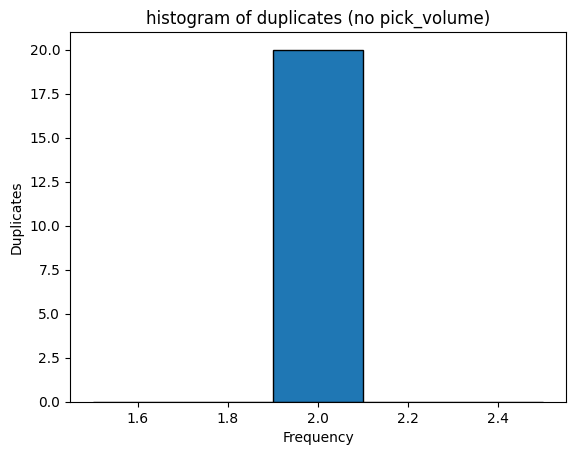

In [64]:
# create histogram
plt.hist(list_duplicates_no_pick_volume, bins=5, edgecolor='black')

# titles and labels
plt.title('histogram of duplicates (no pick_volume)')
plt.xlabel('Frequency')
plt.ylabel('Duplicates')

# Display the plot
plt.show()

> Having reviewed **20** cases, we can say that the **17.913** duplicates (without including **pick_volume**) have just **1** duplicate

**POSIBLE SOLUTIONS**

1) Merge duplicates and save the ***max*** **pick_volume** value

2) Merge duplicates and save the ***min*** **pick_volume** value

3) Merge duplicates and save the ***average*** **pick_volume** value

4) Don't do anything and leave both values